# Visualización

Describiremos la sintaxis que utiliza R para generar gráficos. Utilizaremos las funciones base de R para generar visualizaciones y delimitaremos ciertas buenas prácticas para seleccionar el tipo de gráfico en función de los tipos de datos a visualizar junto con lo que deseamos comunicar.

Utilizaremos la tabla `CHARTEVENTS` para visualizar los datos de signos vitales de pacientes

In [1]:
chartevents = read.csv("data/CHARTEVENTS.csv")

Como exploramos la clase pasada, generaremos un dataframe de frecuencia cardiaca

In [8]:
hr_id = 220045
subject_id = 41976 # Extraeremos sólo los datos de este paciente
hr_subject = chartevents[(chartevents$itemid == hr_id) & (chartevents$subject_id == subject_id),]

# Histograma

Un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Este tipo de gráficos lo podemos utilizar cuando queremos explorar o comunicar la manera en la cual una variable específica se distribuye.

En el eje x se encuentran los valores que puede tomar dicha variable y el eje y representa la cantidad de valores presentes en el rango correspondiente al ancho de la barra del gráfico.

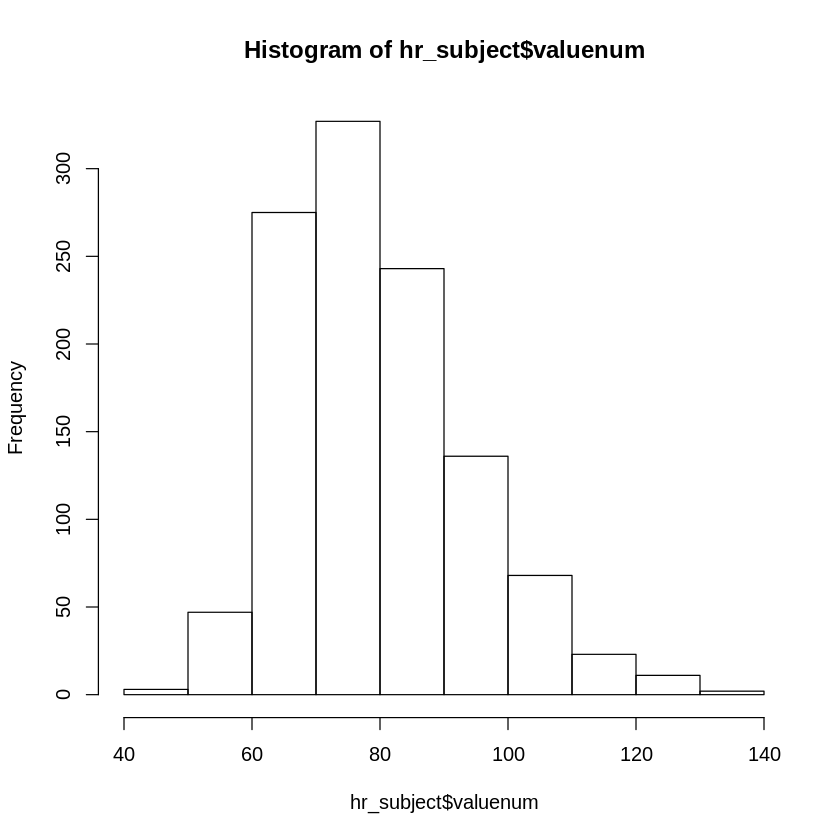

In [10]:
hist(hr_subject$valuenum)

En el gráfico anterior podemos interpretar que los valores de la variable de frecuencia cardiaca se distribuyen entre ~60 y ~90.

Para poder comunicar de manera efectiva nuestro gráfico debemos ser lo más literales con la información que deseamos comunicar. Una visualización siempre debe tener un título general y cada eje debe ser etiquetado también con un título y siempre se debe expresar la unidad en la cual está cada eje.

Modifiquemos nuestro gráfico para ser más expresivos con la información que deseamos comunicar

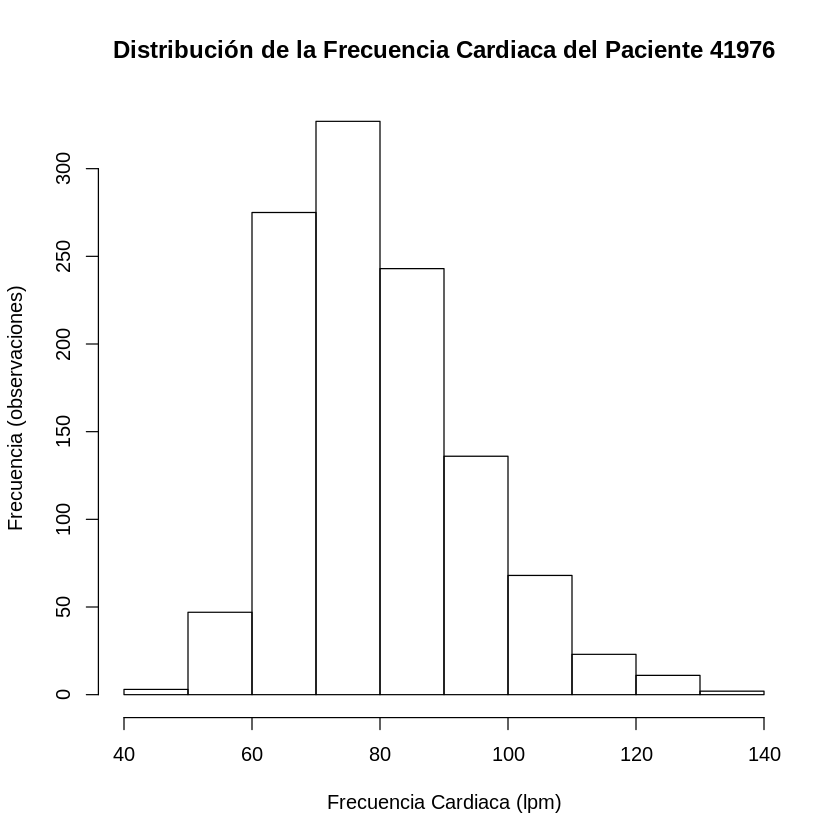

In [16]:
hist(hr_subject$valuenum,
    # La función paste() concatena una serie de valores
    main=paste("Distribución de la Frecuencia Cardiaca del Paciente",subject_id), # Título principal de gráfico
    xlab="Frecuencia Cardiaca (lpm)", # Título del eje x
    ylab="Frecuencia (observaciones)", # Título del eje y
)

Algunos de los parámetros que podemos especificar en el tipo de gráfico histograma son los siguientes.
* Cantidad de divisiones: Con esto podemos especificar el número de divisiones en las cuales se dividirán nuestros valores del eje x.
* Normalización del eje y: Podemos especificar si los valores del eje y sean valores de frecuencia absoluta o relativa.

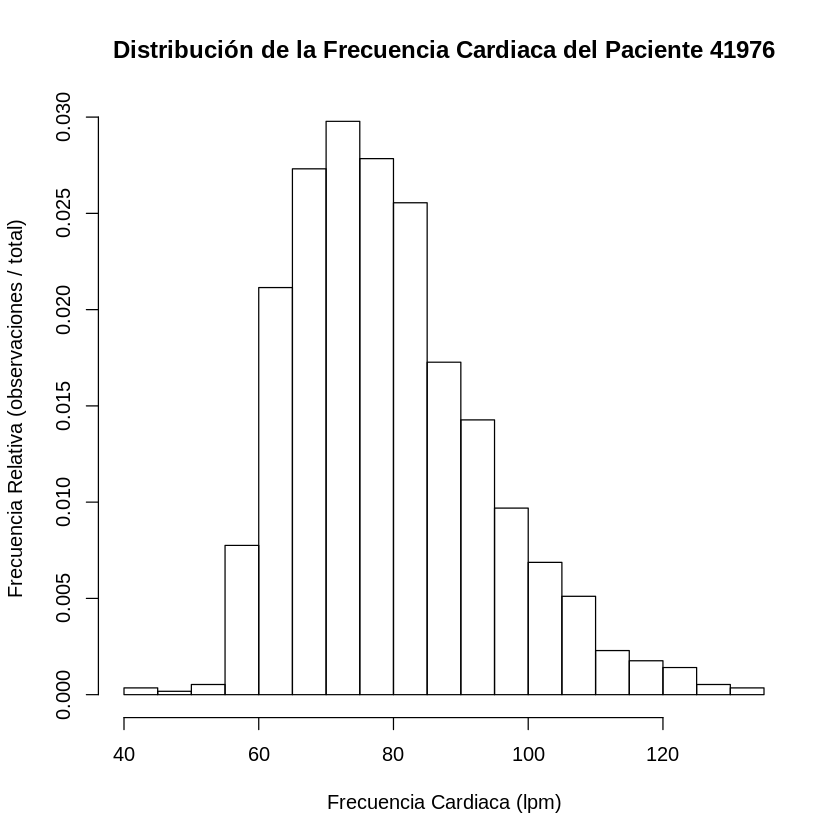

In [22]:
hist(hr_subject$valuenum,
    main=paste("Distribución de la Frecuencia Cardiaca del Paciente",subject_id),
    xlab="Frecuencia Cardiaca (lpm)", 
    ylab="Frecuencia Relativa (observaciones / total)", 
    breaks=20, # Número de divisiones del eje x
    probability=TRUE # Frecuencia relativa en el eje y
)

Si consideramos que los rangos de los ejes son mayores a lo que necesitamos, podemos modificar el rango de cada eje.

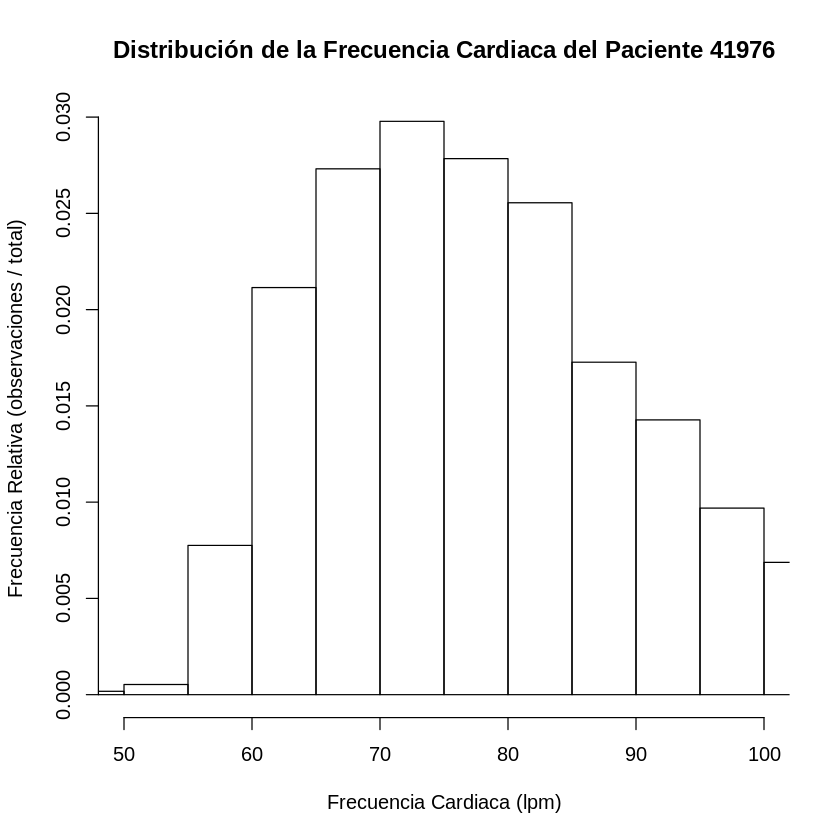

In [28]:
hist(hr_subject$valuenum,
    main=paste("Distribución de la Frecuencia Cardiaca del Paciente",subject_id),
    xlab="Frecuencia Cardiaca (lpm)", 
    ylab="Frecuencia Relativa (observaciones / total)", 
    breaks=20,
    probability=TRUE,
    xlim=c(50,100), # Vector que determina el rango que tendrá el eje.
)

## Gráfico de líneas

Un gráfico de lineas es un tipo de gráfico que despliega información como una serie puntos conectados por segmentos de lineas rectas. Con este gráfico podemos comunicar la relación que existe entre 2 variables y que sabemos a priori que son una secuencia de datos que dependen en la dimensión del eje x. Este es el tipo de gráfico por excelencia para representar series de tiempo.

Vamos a graficar una serie de tiempo, por lo que debemos convertir los datos del eje x en un tipo de dato de fecha y hora. Para esto utilizaremos la funcion as.POSIXct() que convierte un tipo de datos character en un tipo de dato de fecha y hora

In [57]:
hr_subject$charttime = as.POSIXct(hr_subject$charttime) # Convertimos la columna charttime

Para acotar más los datos, vamos a seleccionar un día en específico.

La función as.Date(), realiza la misma conversión que as.POSIXct(), pero sólo considera la fecha del dato, pero no la hora.

In [72]:
day = "2199-02-01"
hr_subject_day = hr_subject[as.Date(hr_subject$charttime) == as.Date(day),]

In [54]:
day = 286072
hr_subject_day = hr_subject[hr_subject$charttime == icustay,]

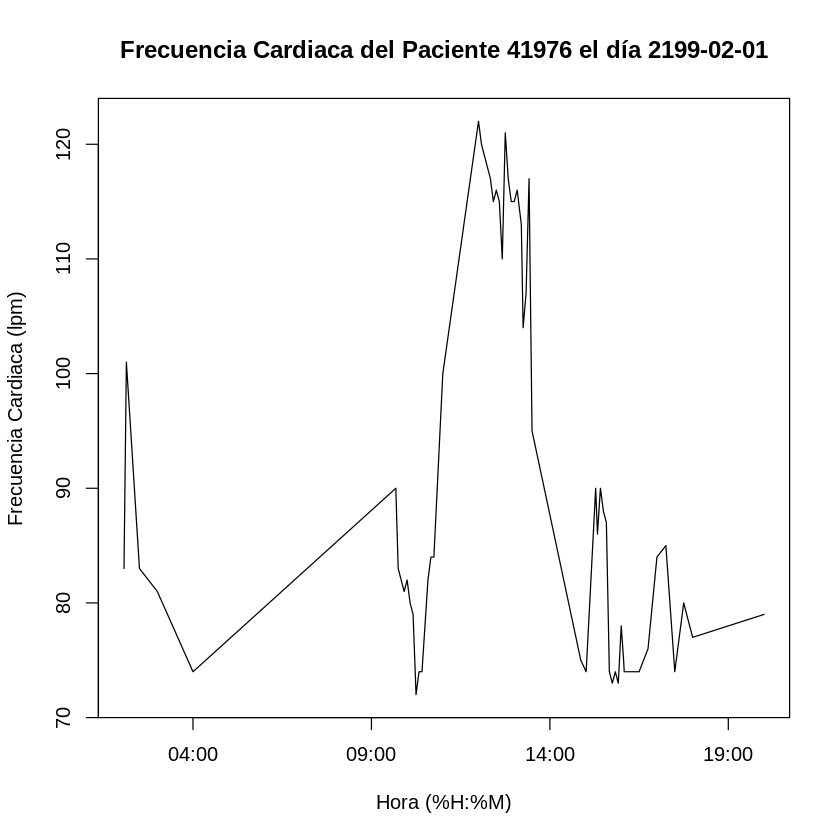

In [79]:
plot(hr_subject_day$charttime,hr_subject_day$valuenum,
     main=paste("Frecuencia Cardiaca del Paciente",subject_id,"el día",day),
     xlab="Hora (%H:%M)",# En este enlace pueden conocer los símbolos utilizados para representar fechas y horas https://devhints.io/datetime
     ylab="Frecuencia Cardiaca (lpm)", 
     type="l"
    )

Generemos un data frame que contenga los valores de presión sistólica y diastólica del paciente que estamos analizando

In [88]:
systolic_id = 220050
systolic_subject = chartevents[(chartevents$itemid == systolic_id) & (chartevents$subject_id == subject_id),]
systolic_subject_day = systolic_subject[as.Date(systolic_subject$charttime) == as.Date(day),]
systolic_subject_day$charttime = as.POSIXct(systolic_subject_day$charttime)

In [89]:
diastolic_id = 220051
diastolic_subject = chartevents[(chartevents$itemid == diastolic_id) & (chartevents$subject_id == subject_id),]
diastolic_subject_day = diastolic_subject[as.Date(diastolic_subject$charttime) == as.Date(day),]
diastolic_subject_day$charttime = as.POSIXct(diastolic_subject_day$charttime)

Grafiquemos ambas mediciones de presión arterial en un sólo gráfico.

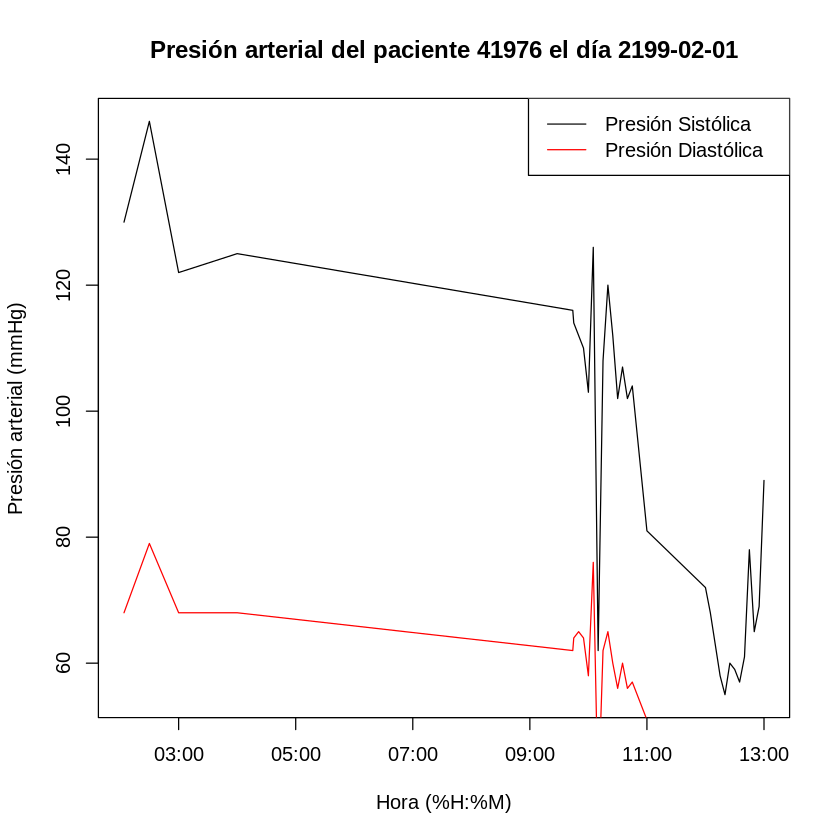

In [108]:
plot(systolic_subject_day$charttime,systolic_subject_day$valuenum,
     main=paste("Presión arterial del paciente",subject_id,"el día",day),
     xlab="Hora (%H:%M)",
     ylab="Presión arterial (mmHg)", 
     type="l"
    )
lines(diastolic_subject_day$charttime,diastolic_subject_day$valuenum, # Graficamos una nueva línea con los datos de presiñón diastólica
     col="red" # Establecemos el color de la nueva linea como rojo
    )
legend("topright", # Graficamos la leyenda en la esquina superior derecha
       legend=c("Presión Sistólica", "Presión Diastólica"), # Texto de la leyenda
       col=c("black", "red"), # Colores de las líneas
       lty=1 # Tipo de linea del gráfico
      )

## Diagrama de caja

In [109]:
labevents = read.csv("data/LABEVENTS.csv")

In [155]:
subject_ids = c(40655,10090)
glucose = labevents[(labevents$subject_id %in% subject_ids) & (labevents$itemid == 50931),]

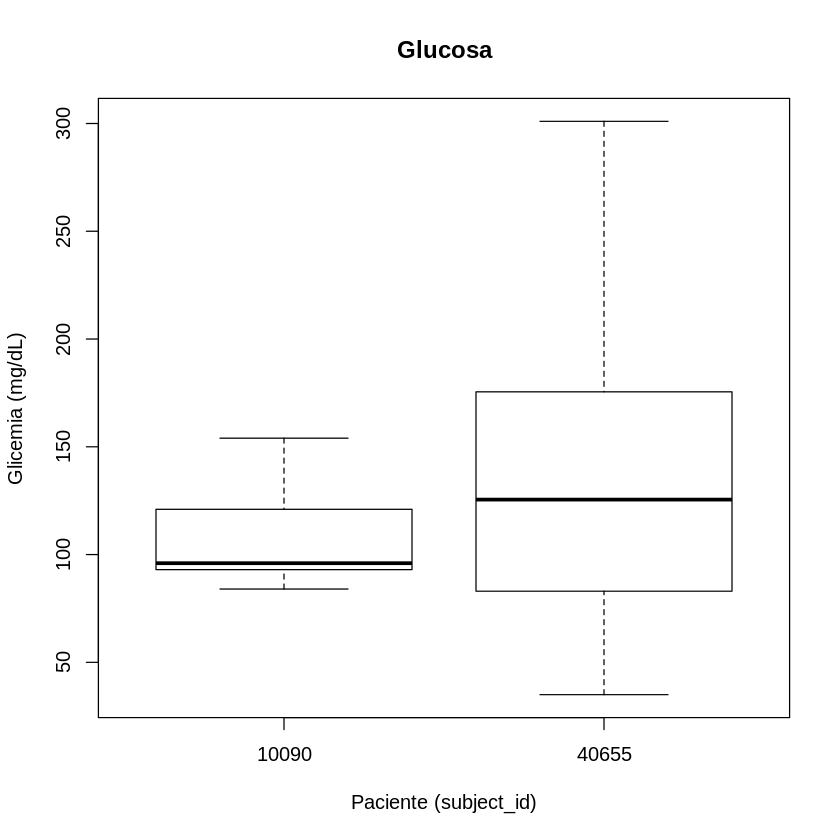

In [168]:
boxplot(formula=valuenum~subject_id,
        data=glucose,
        main="Glucosa",
        xlab="Paciente (subject_id)",
        ylab="Glicemia (mg/dL)")